# 获取数据

In [74]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.dates as mdates
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [16.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

mpl.rcParams['axes.grid'] = 'True'




In [75]:
df = pdr.get_data_tiingo('601398', start='2020-01-01', end='2021-08-11', api_key=os.getenv('TIINGO_API_KEY'))
df.reset_index(level=0, inplace=True)
df.index = df.index.date

# 定义ema的时间窗口

In [77]:
ema_long = 26
ema_short = 12

# 计算MA和EMA

In [78]:
df['ema_long'] = df['adjClose'].ewm(span=ema_long, adjust=False).mean()
df['ema_short'] = df['adjClose'].ewm(span=ema_short, adjust=False).mean()
df['ma_long'] = df['adjClose'].rolling(window=ema_long).mean()
df['ma_short'] = df['adjClose'].rolling(window=ema_short).mean()

# 比较EMA和MA的差别

In [79]:
df[['ma_short','ema_short']].iloc[12:24]

,ma_short,ema_short
2020-01-17,5.335246,5.307076
2020-01-20,5.325483,5.300318
2020-01-21,5.308960,5.284894
2020-01-22,5.295442,5.274616
2020-01-23,5.273662,5.256214
2020-01-24,5.259393,5.240643
2020-01-27,5.245124,5.227467
2020-01-28,5.230854,5.216318
2020-01-29,5.215083,5.206885
2020-01-30,5.198560,5.198903


# plot出来比较一下ema和ma的差别

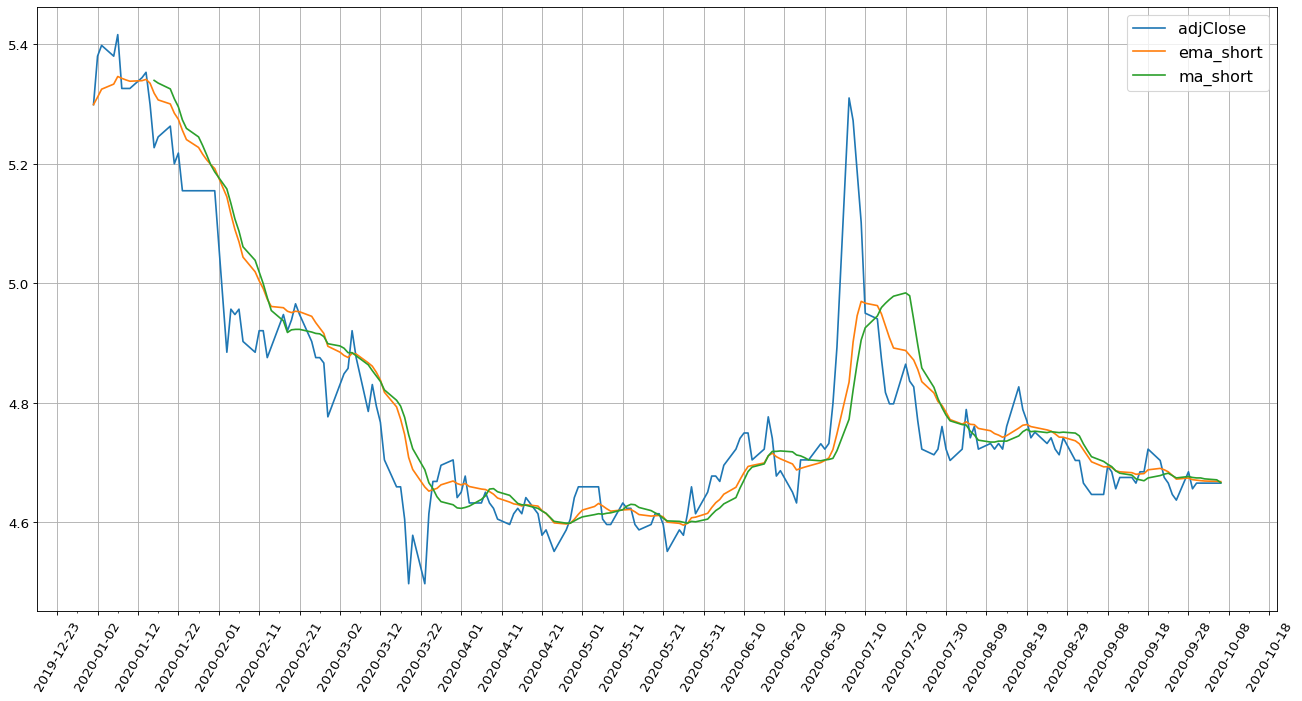

In [82]:
df1 = df.iloc[0:200, :]


df2 = df1[['adjClose','ema_short', 'ma_short']]

df2.plot(figsize=(20,10), rot=60);
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))

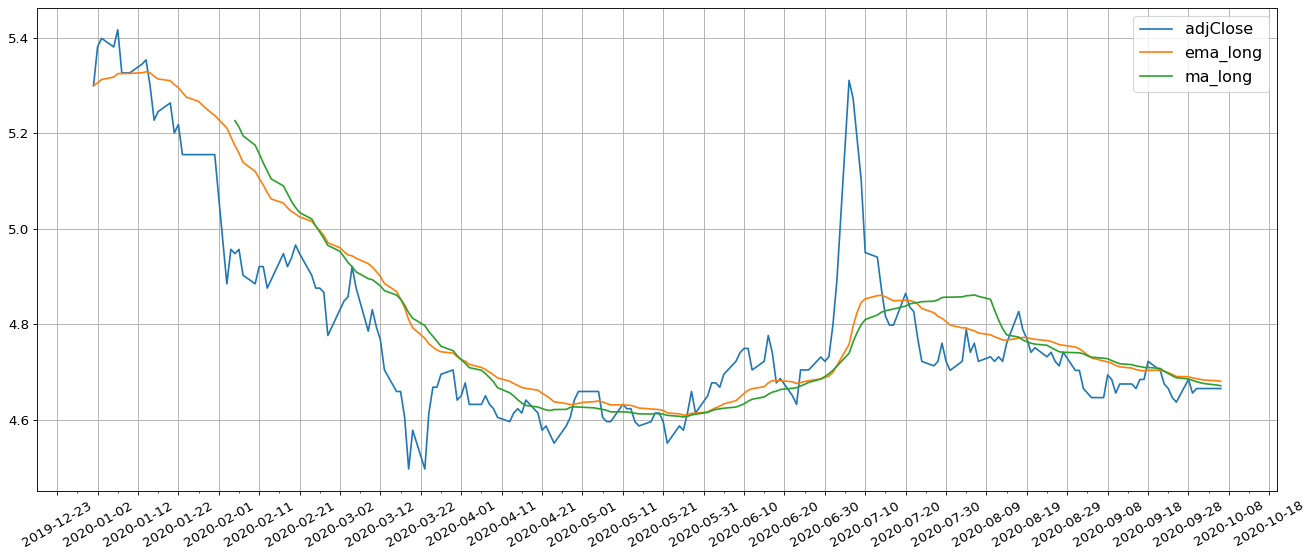

In [83]:
df2 = df1[['adjClose','ema_long', 'ma_long']]
df2.plot(figsize=(20,8), rot=30);
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))

# 计算MACD

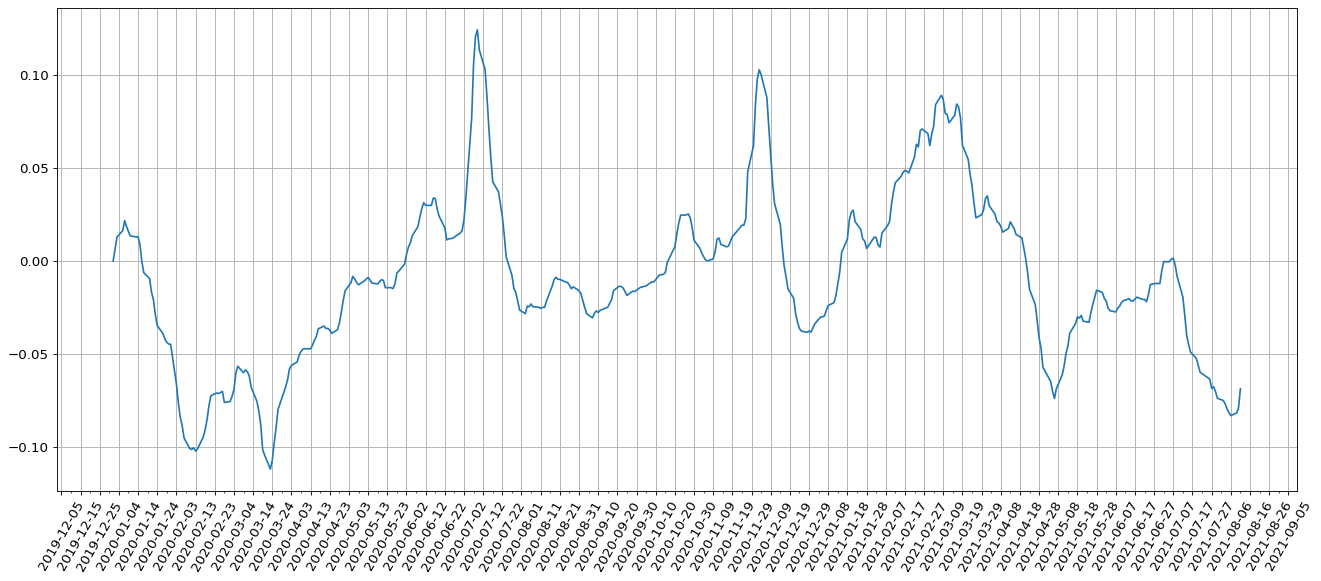

In [84]:
df['macd'] = df['ema_short'] - df['ema_long']
df['macd'].plot(figsize=(20,8), rot=60, grid=True);
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))

# 画出一个0线

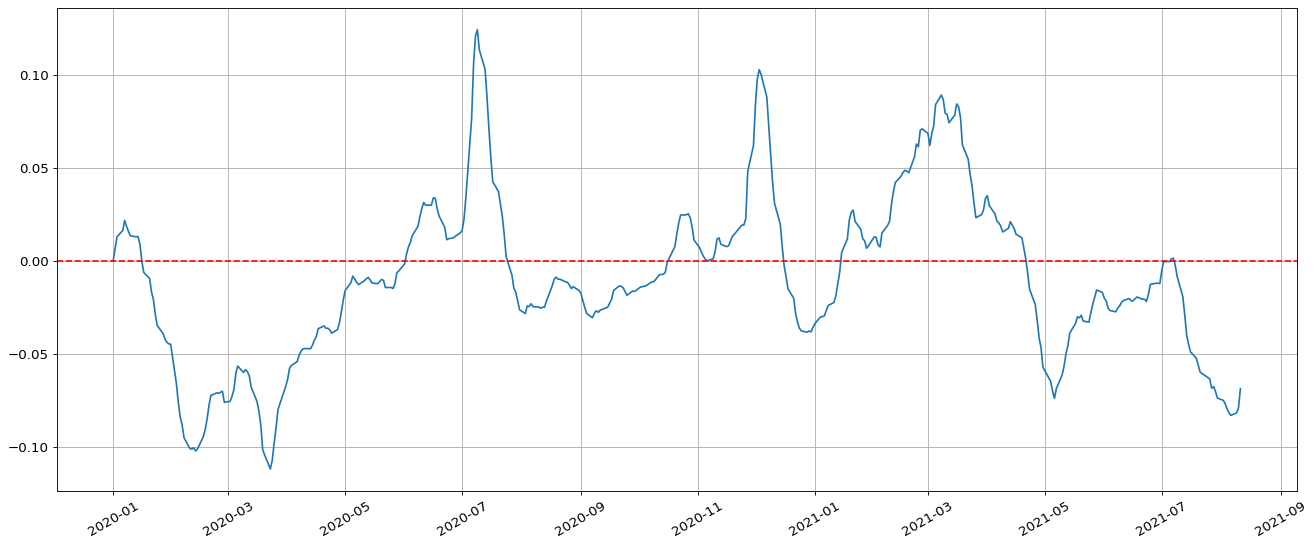

In [85]:
df['macd'].plot(figsize=(20,8), rot=30, grid=True);
plt.axhline(y=0, color='red', linestyle='--');


# 计算macd信号线
## 对macd取 ema(9)


In [86]:
ema_signal = 9

df['macd_signal'] = df['macd'].ewm(span=ema_signal).mean()
df['macd_bar'] = df['macd'] - df['macd_signal']

df1 = df.iloc[0:200, :]


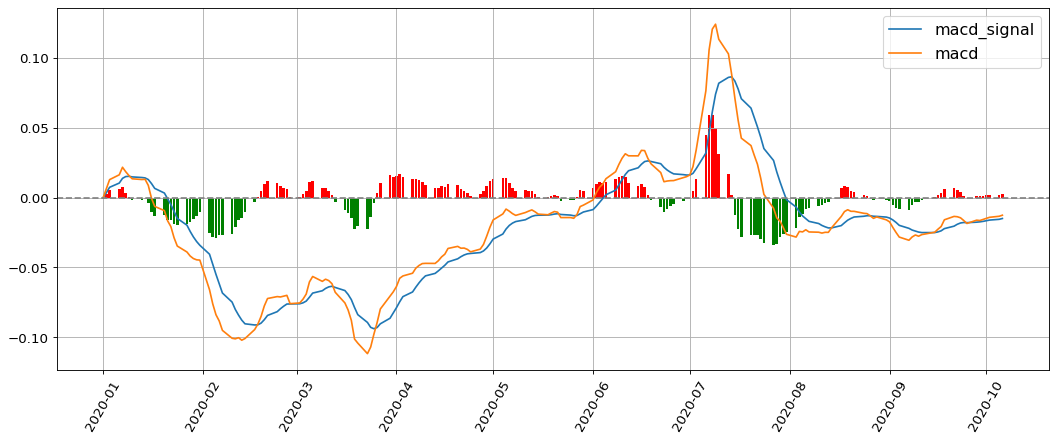

In [69]:
colors = np.where(df1['macd_bar'].values > 0, 'r', 'g')
df1['macd_signal'].plot( rot=60);
df1['macd'].plot( rot=60)
plt.bar(df1.index, df1['macd_bar'], color=colors)

plt.axhline(y=0, linestyle='--', color='gray');
plt.legend();

# 看短一点的时间

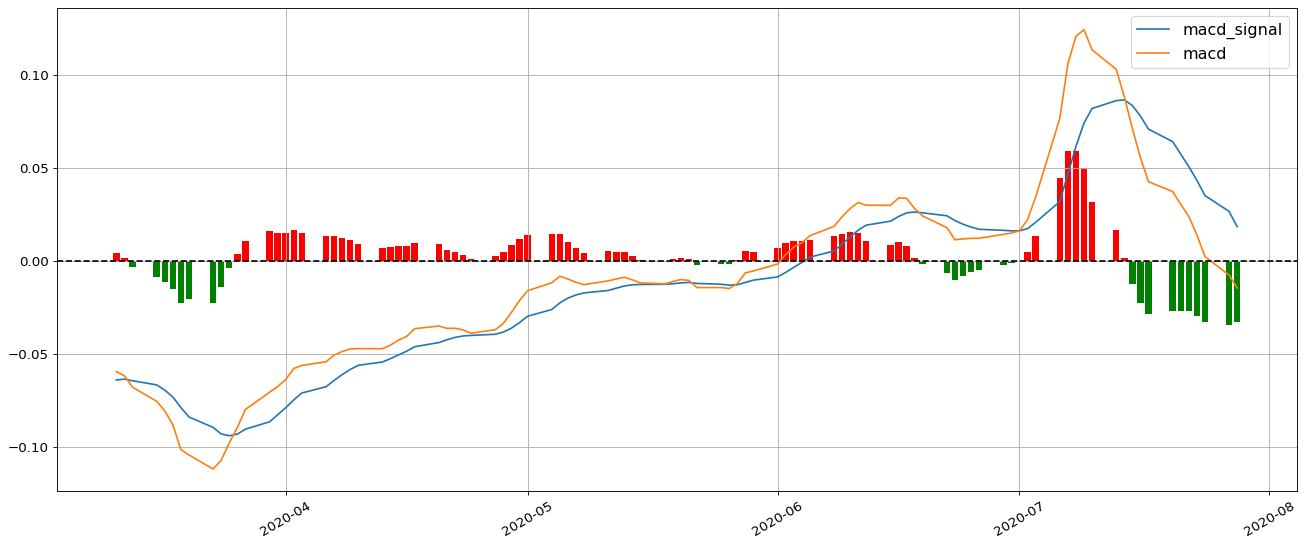

In [87]:
df2 = df.iloc[50:150, :]
colors = np.where(df2['macd_bar'].values > 0, 'r', 'g')
df2['macd_signal'].plot(figsize=(20,8), rot=30, grid=True);
df2['macd'].plot(figsize=(20,8), rot=30, grid=True);
#df['macd_bar'].plot(linestyle='--', color='red')
plt.bar(df2.index, df2['macd_bar'], color=colors)

plt.axhline(y=0, linestyle='--', color='black');
plt.legend();

# 把价格和macd画到一张图上看

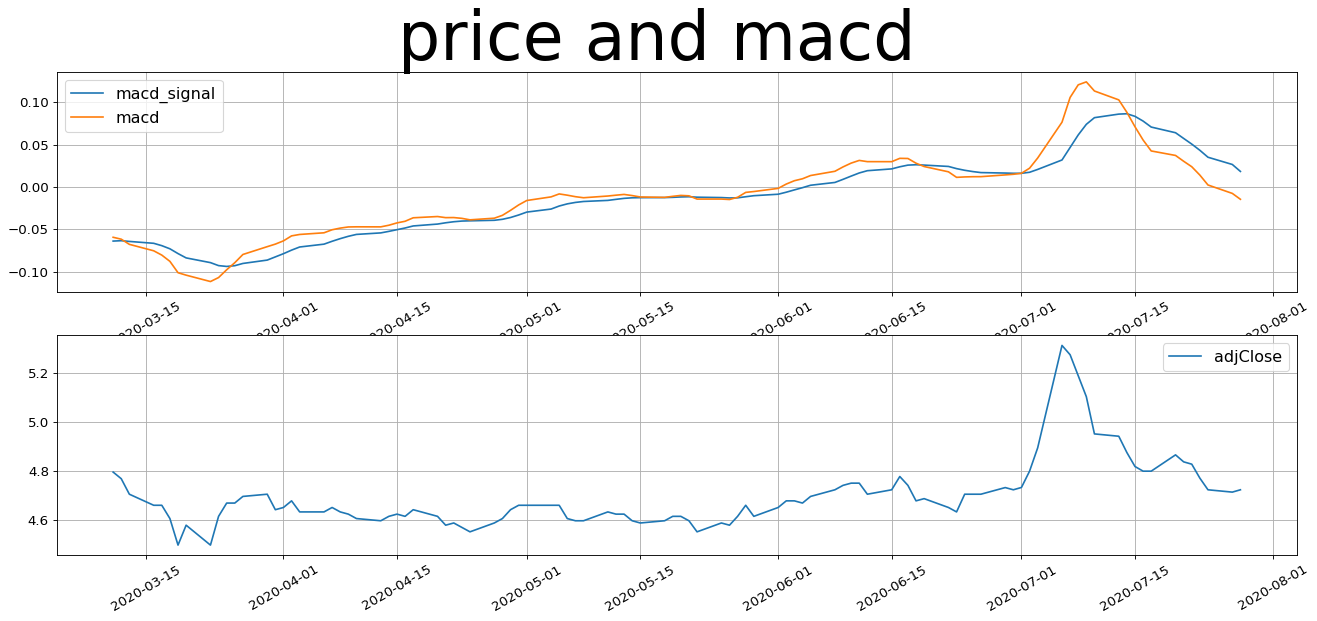

In [88]:
fig = plt.figure(figsize=(24, 20))
fig.suptitle('price and macd', fontsize=60)
axs = fig.subplots(2)

df2 = df.iloc[50:150]
df2['macd_signal'].plot(ax=axs[0], figsize=(20,8), rot=30, grid=True);
df2['macd'].plot(ax=axs[0], figsize=(20,8), rot=30, grid=True);
axs[0].legend()
df2['adjClose'].plot(ax = axs[1], figsize=(20,8), rot=30, grid=True);

plt.legend()